In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install -U scikit-learn scipy matplotlib

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 299.6 kB/s eta 0:00:35
   - -------------------------------------- 0.5/11.0 MB 299.6 kB/s eta 0:00:35
   - -------------------------------------- 0.5/11.0 MB 299.6 kB/s eta 0:00:35
   - -------------------------------------- 0.5/11.0 MB 299.6 kB/s eta 0:00:35
   -- ------------------------------------- 0.8/11.0 MB 282.0 kB/s eta 0:00:37
   -- ------------------------------------- 0

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
!nvidia-smi
tf.config. list_physical_devices
tf.config.list_physical_devices('GPU')

Sat Nov 16 17:23:39 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   50C    P3             24W /   50W |     481MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Legion\datasets\cnn_koi_penyakit


In [112]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="W0pUKnVaS8Z9FHe9GmVe")
project = rf.workspace("ornamental-fish").project("ornamental-fish-diseases")
version = project.version(2)
dataset = version.download("tfrecord")
                

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Code\\anaconda3\\envs\\py310\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)


ModuleNotFoundError: No module named 'roboflow'

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1207 files belonging to 3 classes.


In [60]:
cnn = tf.keras.models.Sequential()

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17 files belonging to 3 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(x,y.shape)
    break

tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 9.50000000e+00]
   [0.00000000e+00 1.00000000e+00 8.00000000e+00]
   [0.00000000e+00 1.25000000e+00 6.50000000e+00]
   ...
   [1.79750000e+02 1.30000000e+02 8.17500000e+01]
   [1.49500000e+02 1.12250000e+02 7.80000000e+01]
   [9.50000000e+00 0.00000000e+00 1.00000000e+00]]

  [[7.32500000e+01 7.92500000e+01 9.27500000e+01]
   [7.37500000e+01 8.00000000e+01 9.20000000e+01]
   [7.57500000e+01 8.20000000e+01 9.02500000e+01]
   ...
   [1.66250000e+02 1.19000000e+02 7.15000000e+01]
   [1.40000000e+02 1.05750000e+02 7.32500000e+01]
   [6.25000000e+00 2.50000000e-01 1.00000000e+00]]

  [[8.10000000e+01 8.52500000e+01 1.05000000e+02]
   [7.92500000e+01 8.35000000e+01 1.00750000e+02]
   [8.07500000e+01 8.45000000e+01 9.45000000e+01]
   ...
   [1.64000000e+02 1.20000000e+02 7.30000000e+01]
   [1.35250000e+02 1.05500000e+02 7.47500000e+01]
   [3.50000000e+00 7.50000000e-01 2.00000000e+00]]

  ...

  [[2.50000000e-01 2.50000000e-01 2.50000000e-01]
   [1

In [6]:
## Building model

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential


In [8]:
#For 3 Classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Create the model
model = Sequential()

# Convolutional layers with padding and ReLU activation
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Dropout for regularization
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Dense layer with reduced units
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))

# Output layer for 3 classes
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch, lr):
    if epoch > 15:
        return lr * 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
training_history = model.fit(x=training_set, 
                             validation_data=validation_set, 
                             epochs=22, 
                             callbacks=[lr_scheduler])


Epoch 1/22


KeyboardInterrupt: 

In [9]:
model = Sequential()

In [10]:
## Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Dropout(0.25)) #to avoid overfitting

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500, activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output layer
model.add(Dense(units=3, activation='softmax'))

In [21]:
#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(loss=tf.keras.losses.categorical_crossentropy,
 #             optimizer=tf.keras.optimizers.Adam(),
  #            metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

In [23]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=22)

Epoch 1/22
38/38 [==============================] - 6s 128ms/step - loss: 1.2423 - accuracy: 0.3654 - val_loss: 1.1113 - val_accuracy: 0.2353
Epoch 2/22
38/38 [==============================] - 2s 59ms/step - loss: 1.0581 - accuracy: 0.4217 - val_loss: 0.9435 - val_accuracy: 0.6471
Epoch 3/22
38/38 [==============================] - 2s 58ms/step - loss: 1.0106 - accuracy: 0.4714 - val_loss: 0.9402 - val_accuracy: 0.4118
Epoch 4/22
38/38 [==============================] - 2s 59ms/step - loss: 0.8674 - accuracy: 0.6040 - val_loss: 0.7263 - val_accuracy: 0.8235
Epoch 5/22
38/38 [==============================] - 2s 58ms/step - loss: 0.7764 - accuracy: 0.6694 - val_loss: 0.7143 - val_accuracy: 0.8235
Epoch 6/22
38/38 [==============================] - 2s 59ms/step - loss: 0.6138 - accuracy: 0.7481 - val_loss: 0.7940 - val_accuracy: 0.7059
Epoch 7/22
38/38 [==============================] - 2s 59ms/step - loss: 0.4996 - accuracy: 0.7987 - val_loss: 1.2969 - val_accuracy: 0.7647
Epoch 8/22
3

In [26]:
##Model Evaluation

In [24]:
#Model Evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

38/38 [==============================] - 1s 19ms/step - loss: 0.0059 - accuracy: 0.9983


In [25]:
print(train_loss, train_acc)

0.005901647266000509 0.9983429908752441


In [26]:
#Model on validation set
val_loss, val_acc = model.evaluate(validation_set)

1/1 [==============================] - 0s 60ms/step - loss: 1.3058 - accuracy: 0.8235


In [27]:
print(val_loss, val_acc)

1.3057817220687866 0.8235294222831726


In [28]:
model.save("trained_model.h5")

In [29]:
model.save("trained_model.keras")

In [250]:
training_history.history

{'loss': [1.0158461332321167,
  0.8407344818115234,
  0.7495936751365662,
  0.6552695035934448,
  0.541985034942627,
  0.4963924288749695,
  0.40111276507377625,
  0.33600279688835144,
  0.29014095664024353,
  0.23343774676322937,
  0.18602637946605682,
  0.14574672281742096,
  0.11158881336450577,
  0.07689666748046875,
  0.0860338881611824],
 'accuracy': [0.5228040814399719,
  0.6176801919937134,
  0.6669481992721558,
  0.7249436974525452,
  0.7792792916297913,
  0.8018018007278442,
  0.8479729890823364,
  0.869369387626648,
  0.8885135054588318,
  0.9110360145568848,
  0.9307432174682617,
  0.9476351141929626,
  0.9591779112815857,
  0.9740990996360779,
  0.971565306186676],
 'val_loss': [0.7397603392601013,
  0.5470203757286072,
  0.40573394298553467,
  0.5032200813293457,
  0.3523086905479431,
  0.28185081481933594,
  0.3898836076259613,
  0.07298332452774048,
  0.25559115409851074,
  0.21716299653053284,
  0.06061391159892082,
  0.1382291615009308,
  0.1133532002568245,
  0.34290

In [251]:
#Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

ValueError: x and y must have same first dimension, but have shapes (20,) and (15,)

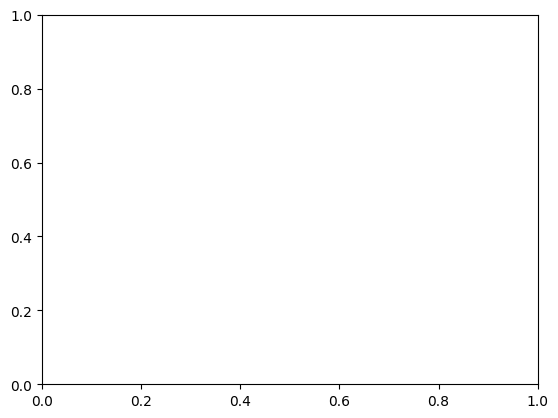

In [252]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [43]:
class_name = validation_set.class_names
class_name

['Bacterial Diseases', 'Fungal Diseases', 'Parasitic Diseases']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1219 files belonging to 3 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

39/39 [==============================] - 2s 34ms/step


(array([[1.74014679e-13, 1.00000000e+00, 1.29878871e-16],
        [1.35116143e-05, 9.99043882e-01, 9.42610495e-04],
        [9.99971390e-01, 5.73256557e-06, 2.28341578e-05],
        ...,
        [1.06209264e-07, 9.99999166e-01, 6.64799984e-07],
        [9.99990582e-01, 4.48174433e-06, 4.89680951e-06],
        [1.95465100e-06, 9.99991536e-01, 6.51547862e-06]], dtype=float32),
 (1219, 3))

In [37]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(1219,), dtype=int64, numpy=array([1, 1, 0, ..., 1, 0, 1], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1219, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1219,), dtype=int64, numpy=array([2, 1, 1, ..., 1, 0, 2], dtype=int64)>

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                    precision    recall  f1-score   support

Bacterial Diseases       0.32      0.32      0.32       407
   Fungal Diseases       0.33      0.33      0.33       416
Parasitic Diseases       0.30      0.30      0.30       396

          accuracy                           0.32      1219
         macro avg       0.32      0.32      0.32      1219
      weighted avg       0.32      0.32      0.32      1219



In [143]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape
cm

array([[124, 126,   0, 137],
       [136, 118,   0, 130],
       [127, 138,   0, 132],
       [  0,   0,   0,   0]], dtype=int64)

### Confusion matrix visualization

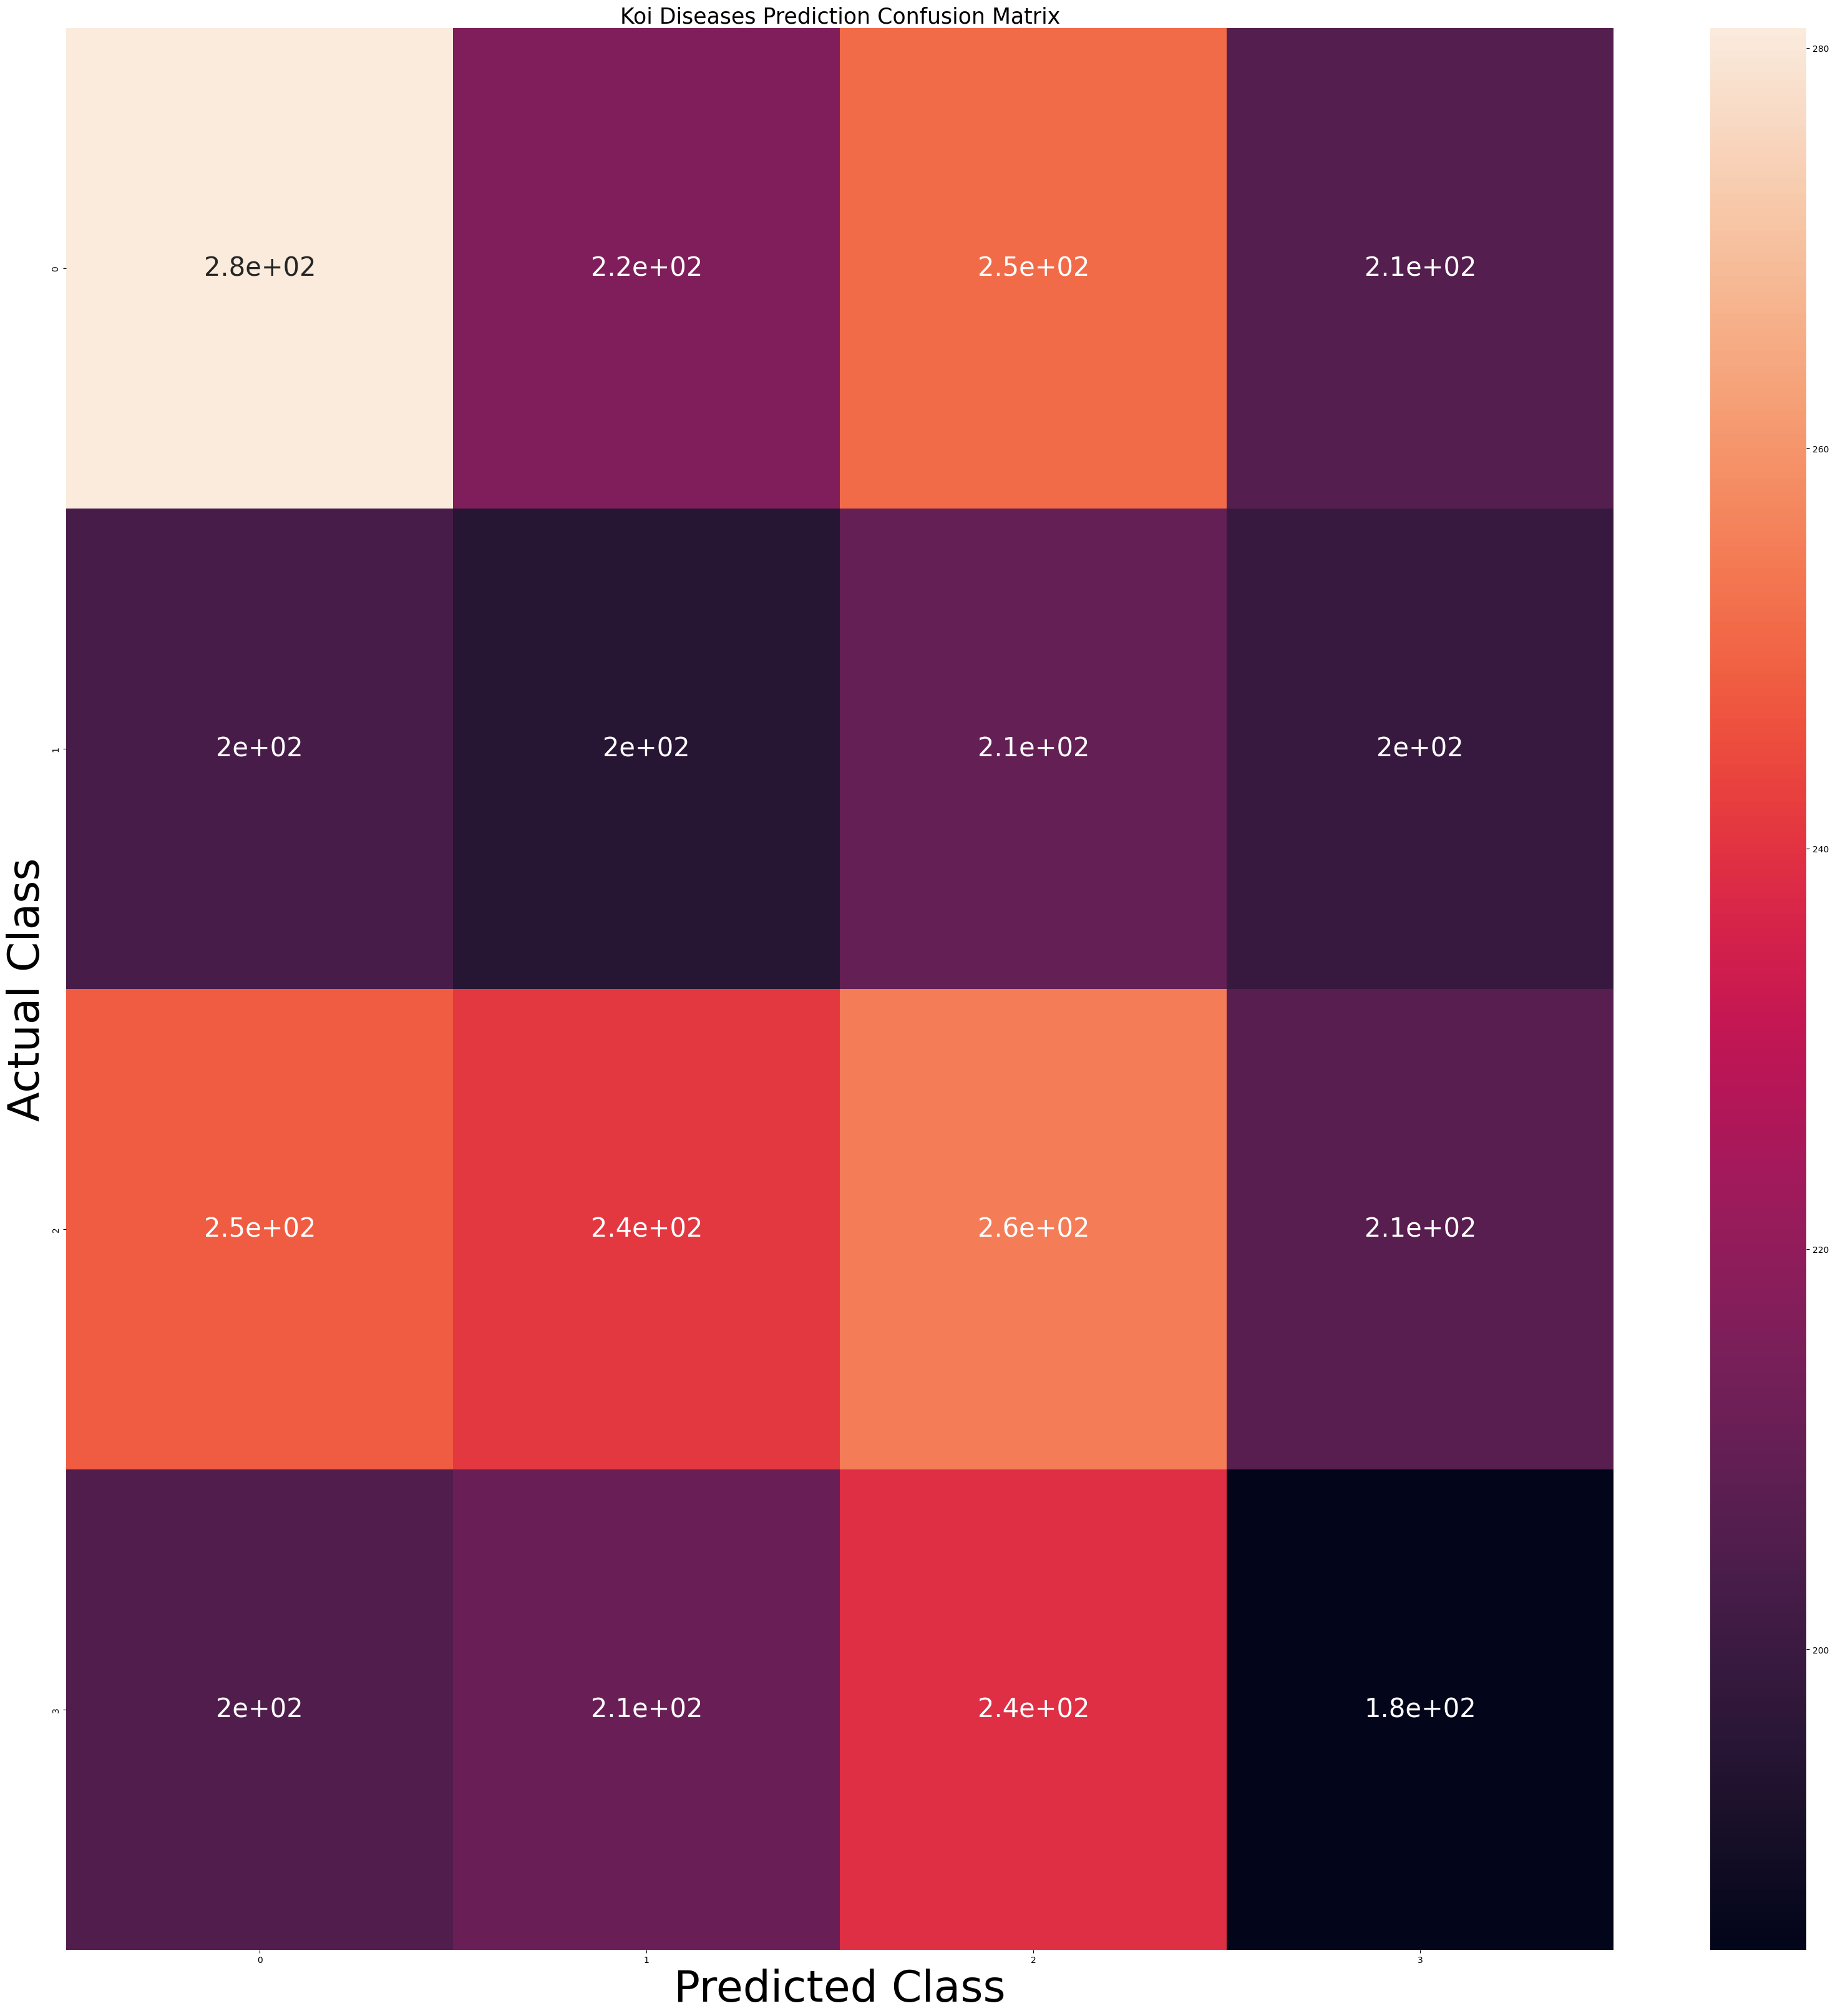

In [285]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, annot_kws={'size':30})
plt.xlabel("Predicted Class", fontsize=50)
plt.ylabel("Actual Class", fontsize=50)
plt.title("Koi Diseases Prediction Confusion Matrix", fontsize=25)
plt.show()

### Data Augmentation

In [49]:
#using python and keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

img = load_img('secondary_datasets/fungalreserve/fungzood.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# the .flow below generates batches of randomly transformed images
# and saves the result in image directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='fungus', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [58]:
import numpy as np

In [274]:
#Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

D:\Code\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Code\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Code\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
